In [33]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import skimage
from skimage import io
from skimage.color import rgb2gray
from skimage import filters
import matplotlib as mpl
import cv2

In [34]:
im_path1 = 'people1_01.ppm'
im_path2 = 'people1_02.ppm'
im1 = io.imread(im_path1)
im2 = io.imread(im_path2)
im1 = rgb2gray(im1)
im2 = rgb2gray(im2)

im1 = im1 / 255.0
im2 = im2 / 255.0
im1 = cv2.blur(im1,(5,5))
im2 = cv2.blur(im2,(5,5))

Ix = filters.sobel_v(im1)
Iy = filters.sobel_h(im1)
It = im2 - im1

rows, cols = im1.shape
neighbor_size = 5

In [39]:
def lucas_kanade (im1, im2, neighbor_size):
    u = np.zeros(im1.shape)
    v = np.zeros(im1.shape)
    offset = int(neighbor_size / 2)
    for i in range(offset, rows - offset):
        for j in range(offset, cols - offset):
            A = neighbor_calc(i, j, Ix, Iy, neighbor_size)
            b = timeDeriv(i, j, It, neighbor_size)
            temp = np.linalg.lstsq(A,-b,rcond=None)[0]
    
            u[i, j] = temp[0]
            v[i, j] = temp[1]
    return u, v

In [40]:
def neighbor_calc (row, col, Ix, Iy, neighbor_size):
    offset = int(neighbor_size / 2)
    A = np.zeros((neighbor_size ** 2, 2), float)
    index = 0
    for x in range(-offset, offset):
        for y in range(-offset, offset):
            A[index, 0] = Ix[row + x, col + y]
            A[index, 1] = Iy[row + x, col + y]
            index += 1
           
    return A                
            

In [41]:
def timeDeriv (row, col, It, neighbor_size):
    offset = int(neighbor_size / 2)
    b = np.zeros((neighbor_size ** 2, 1), float)
    index = 0
    for x in range(-offset, offset):
        for y in range(-offset, offset):
            b[index] = It[row + x, col + y]
            index += 1
            
    return b        

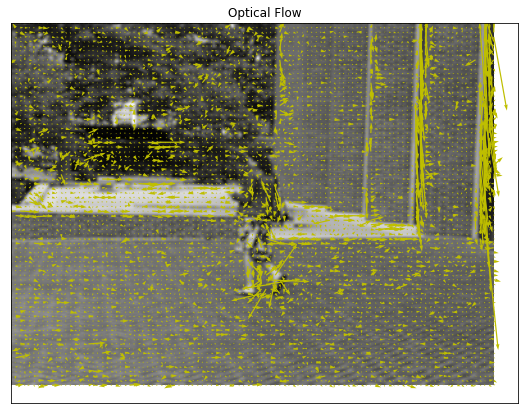

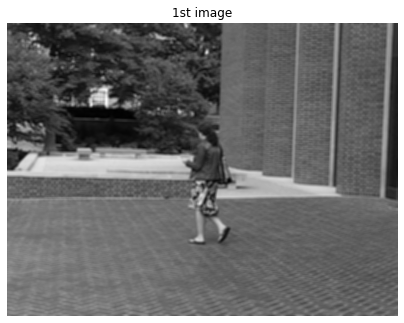

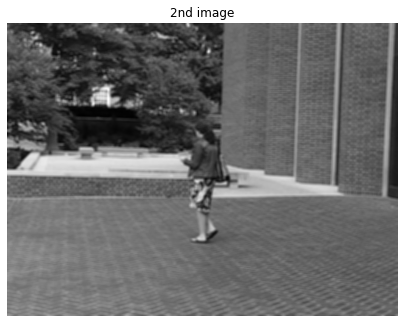

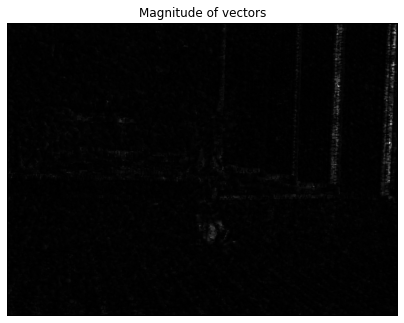

In [42]:
u, v = lucas_kanade(im1, im2, neighbor_size)

vector_mag = np.sqrt(u ** 2 + v ** 2)


# Subsample the vector field to make it less dense
subsample = 6
sub_u = u[0:rows:subsample, 0:cols:subsample] 
sub_v = v[0:rows:subsample, 0:cols:subsample]
xc = np.linspace(0, cols, sub_u.shape[1])
yc = np.linspace(0, rows, sub_u.shape[0])
# Locations of the vectors
xv, yv = np.meshgrid(xc, yc)
fig0 = plt.figure(figsize = (14,7))
plt.imshow(im1,cmap = 'gray')
plt.title('Optical Flow'), plt.xticks([]), plt.yticks([])
# Plot the vectors
plt.quiver(xv, yv, sub_u, sub_v, color='y')

        
#vector_im = vector_im * 255            

fig1 = plt.figure(figsize = (7,7))
plt.axis('off')
plt.imshow(im1, cmap='gray')
plt.title("1st image")
plt.show()  
fig2 = plt.figure(figsize = (7,7))
plt.axis('off')
plt.imshow(im2, cmap='gray')
plt.title("2nd image")
plt.show() 


fig3 = plt.figure(figsize = (7,7))
plt.axis('off')
plt.imshow(vector_mag, cmap='gray')
plt.title("Magnitude of vectors")
plt.show() 